In [1]:
!nvidia-smi

Sun Dec 17 16:13:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%ls

 calibration_image_sample_data_20x128x128x3_float32.npy  'Research paper.docx'
 dataset.zip                                             'Resume - Prerit [CMU].pdf.pdf'
'Getting started.pdf'                                     runs.zip
 reeep.pdf                                               'Untitled folder'/


In [ ]:
# import shutil

# shutil.rmtree('datasets')

In [ ]:
# Unzipp
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [ ]:
!unzip runs.zip

Archive:  runs.zip
   creating: content/runs/
   creating: content/runs/detect/
   creating: content/runs/detect/train2/
   creating: content/runs/detect/train2/weights/
  inflating: content/runs/detect/train2/args.yaml  
   creating: content/runs/detect/train3/
  inflating: content/runs/detect/train3/val_batch2_pred.jpg  
  inflating: content/runs/detect/train3/PR_curve.png  
  inflating: content/runs/detect/train3/results.csv  
  inflating: content/runs/detect/train3/train_batch0.jpg  
  inflating: content/runs/detect/train3/val_batch2_labels.jpg  
   creating: content/runs/detect/train3/weights/
  inflating: content/runs/detect/train3/weights/best.pt  
  inflating: content/runs/detect/train3/weights/best.onnx  
  inflating: content/runs/detect/train3/weights/last.pt  
   creating: content/runs/detect/train3/weights/best_saved_model/
 extracting: content/runs/detect/train3/weights/best_saved_model/fingerprint.pb  
  inflating: content/runs/detect/train3/weights/best_saved_model/metad

In [3]:
# !pip install ultralytics==8.0.20
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

italicised text## CLI Basics

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y478zuHhdDGlsa3HQEwr")
project = rf.workspace("aerial-v35db").project("aerial_object_detection")
dataset = project.version(7).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Suc

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Aerial_Object_Detection-7 in yolov8:: 100%|██████████| 1872/1872 [00:00<00:00, 3594.70it/s]


## Custom Training

In [6]:
!pwd

/content/datasets


In [ ]:
%cd datasets

/content/datasets


In [8]:
dataset.location

'/content/datasets/Aerial_Object_Detection-7'

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=80 imgsz=950 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 337MB/s]
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Aerial_Object_Detection-7/data.yaml, epochs=80, patience=50, batch=16, imgsz=950, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [1]:
model=YOLO('/content/runs/detect/train/weights/best.pt')
model.export(format="pb")

NameError: ignored

In [ ]:
# !pip3 install --upgrade tensorflow==2.13.1
import tensorflow as tf
print(tf.__version__)

2.13.1


In [20]:
# DOWNLOADING
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [25]:
!zip -r datasets.zip /content/datasets


  adding: content/datasets/ (stored 0%)
  adding: content/datasets/Aerial_Object_Detection-7/ (stored 0%)
  adding: content/datasets/Aerial_Object_Detection-7/README.roboflow.txt (deflated 44%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/ (stored 0%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels.cache (deflated 59%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels/ (stored 0%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels/21639_jpg.rf.21bcb64e0edd372e42405b4c9b6e7f69.txt (deflated 75%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels/21876_jpg.rf.48e40900d11ae759b3740a851084bf1a.txt (deflated 68%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels/21974_jpg.rf.9b08542881d4956cb70b13f995a1bde5.txt (deflated 58%)
  adding: content/datasets/Aerial_Object_Detection-7/valid/labels/00076_jpg.rf.f93f4556cfef4496deb561f13ed4c18b.txt (deflated 62%)
  adding: content/datasets/Aerial_Object_Det

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# %cd {HOME}
# model= YOLO('yolov8n.pt')
# model.train(data="/content/datasets/Aerial_Object_Detection-6/data.yaml" ,epochs=100)


/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Aerial_Object_Detection-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

RuntimeError: ignored

In [ ]:
model=YOLO('/content/runs/detect/train3/weights/best.pt')
model.predict('/content/im1.png',save=True)



image 1/1 /content/im1.png: 512x960 3 Vehicles, 18.2ms
Speed: 4.6ms preprocess, 18.2ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 960)
Results saved to runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Fire', 1: 'Human', 2: 'Vehicle'}
 orig_img: array([[[190, 202, 202],
         [199, 207, 210],
         [199, 209, 211],
         ...,
         [ 36,  94,  97],
         [ 36,  94,  96],
         [ 38,  96,  99]],
 
        [[175, 196, 197],
         [191, 205, 206],
         [201, 209, 209],
         ...,
         [ 38,  98, 104],
         [ 39,  97, 103],
         [ 40,  97, 103]],
 
        [[204, 211, 211],
         [209, 214, 214],
         [212, 218, 217],
         ...,
         [ 40, 100, 109],
         [ 40,  98, 105],
         [ 40,  97, 106]],
 
        ...,
 
        [[135, 171, 173],
         [147, 177, 180],
         [155, 182, 185],
         ...,
         [214, 221, 223],
         [216, 223, 223],
         [221, 225, 225]],
 
        [[102, 150, 154],
         [117, 155, 160],
         [133, 166, 168],
         ...,
     

In [ ]:
!cd ..

In [ ]:
!ls /content/runs/detect/train3

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1702752544.ec2b51e6ff2b.3255.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


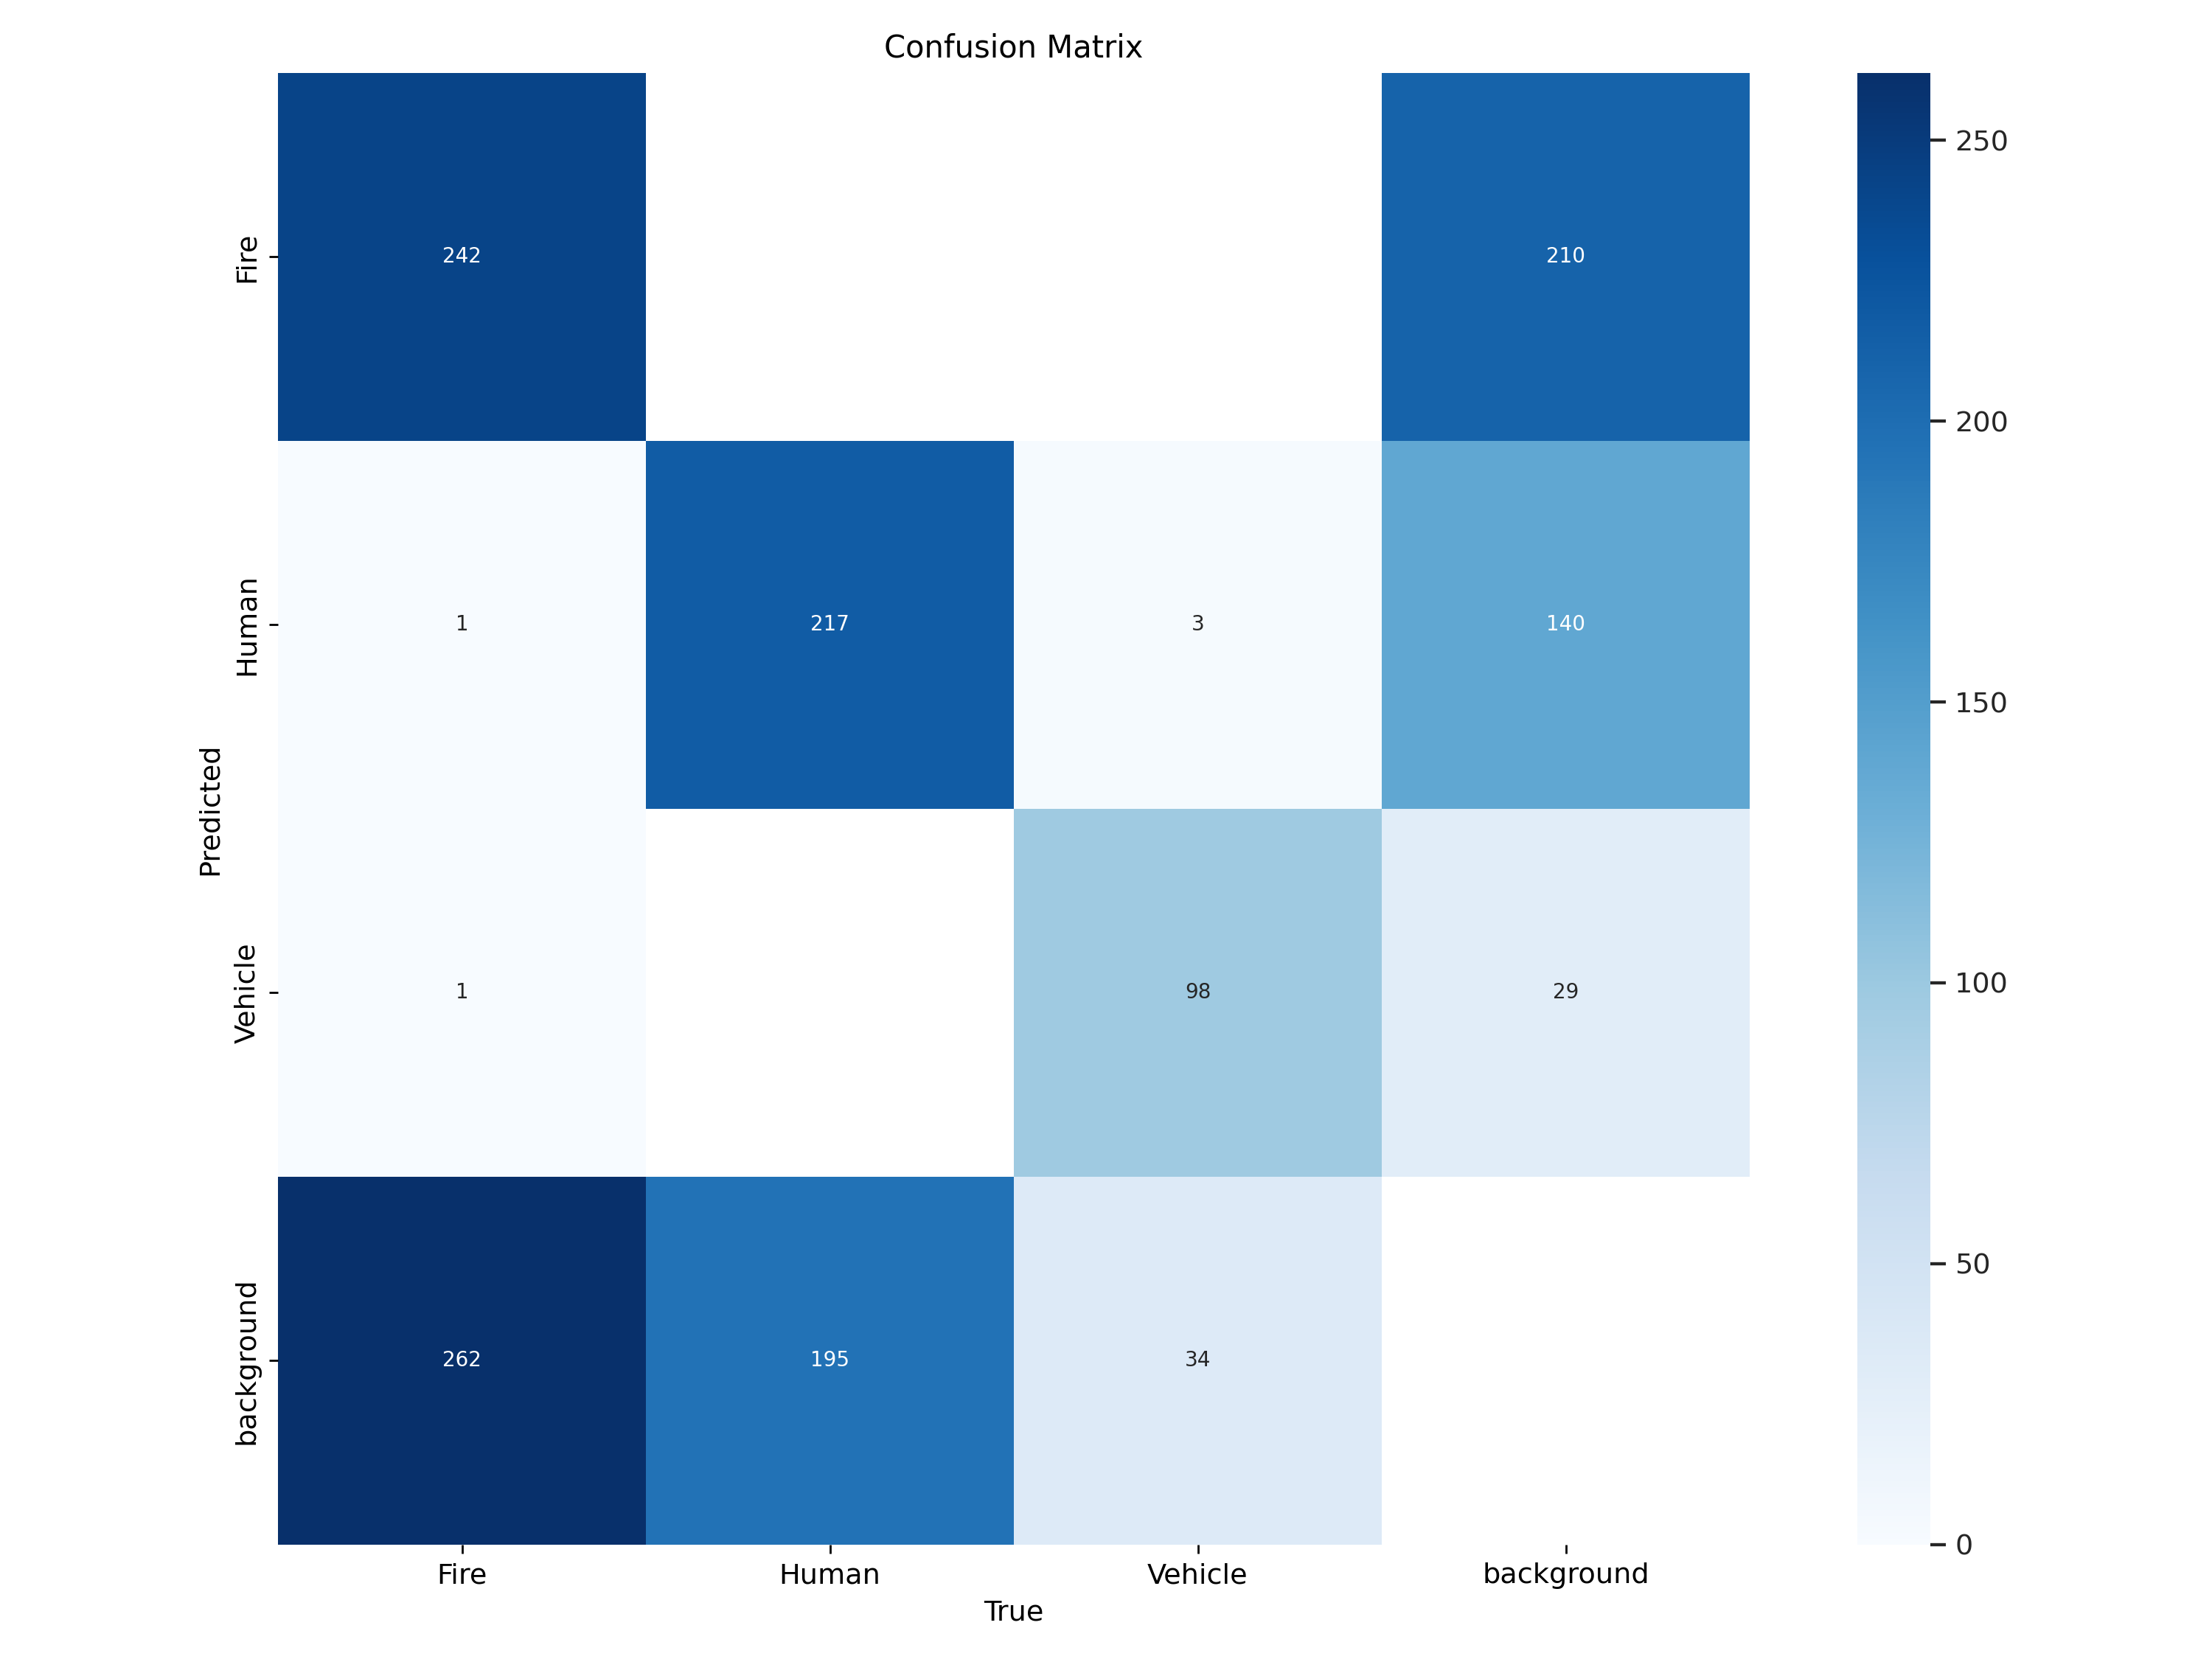

In [14]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


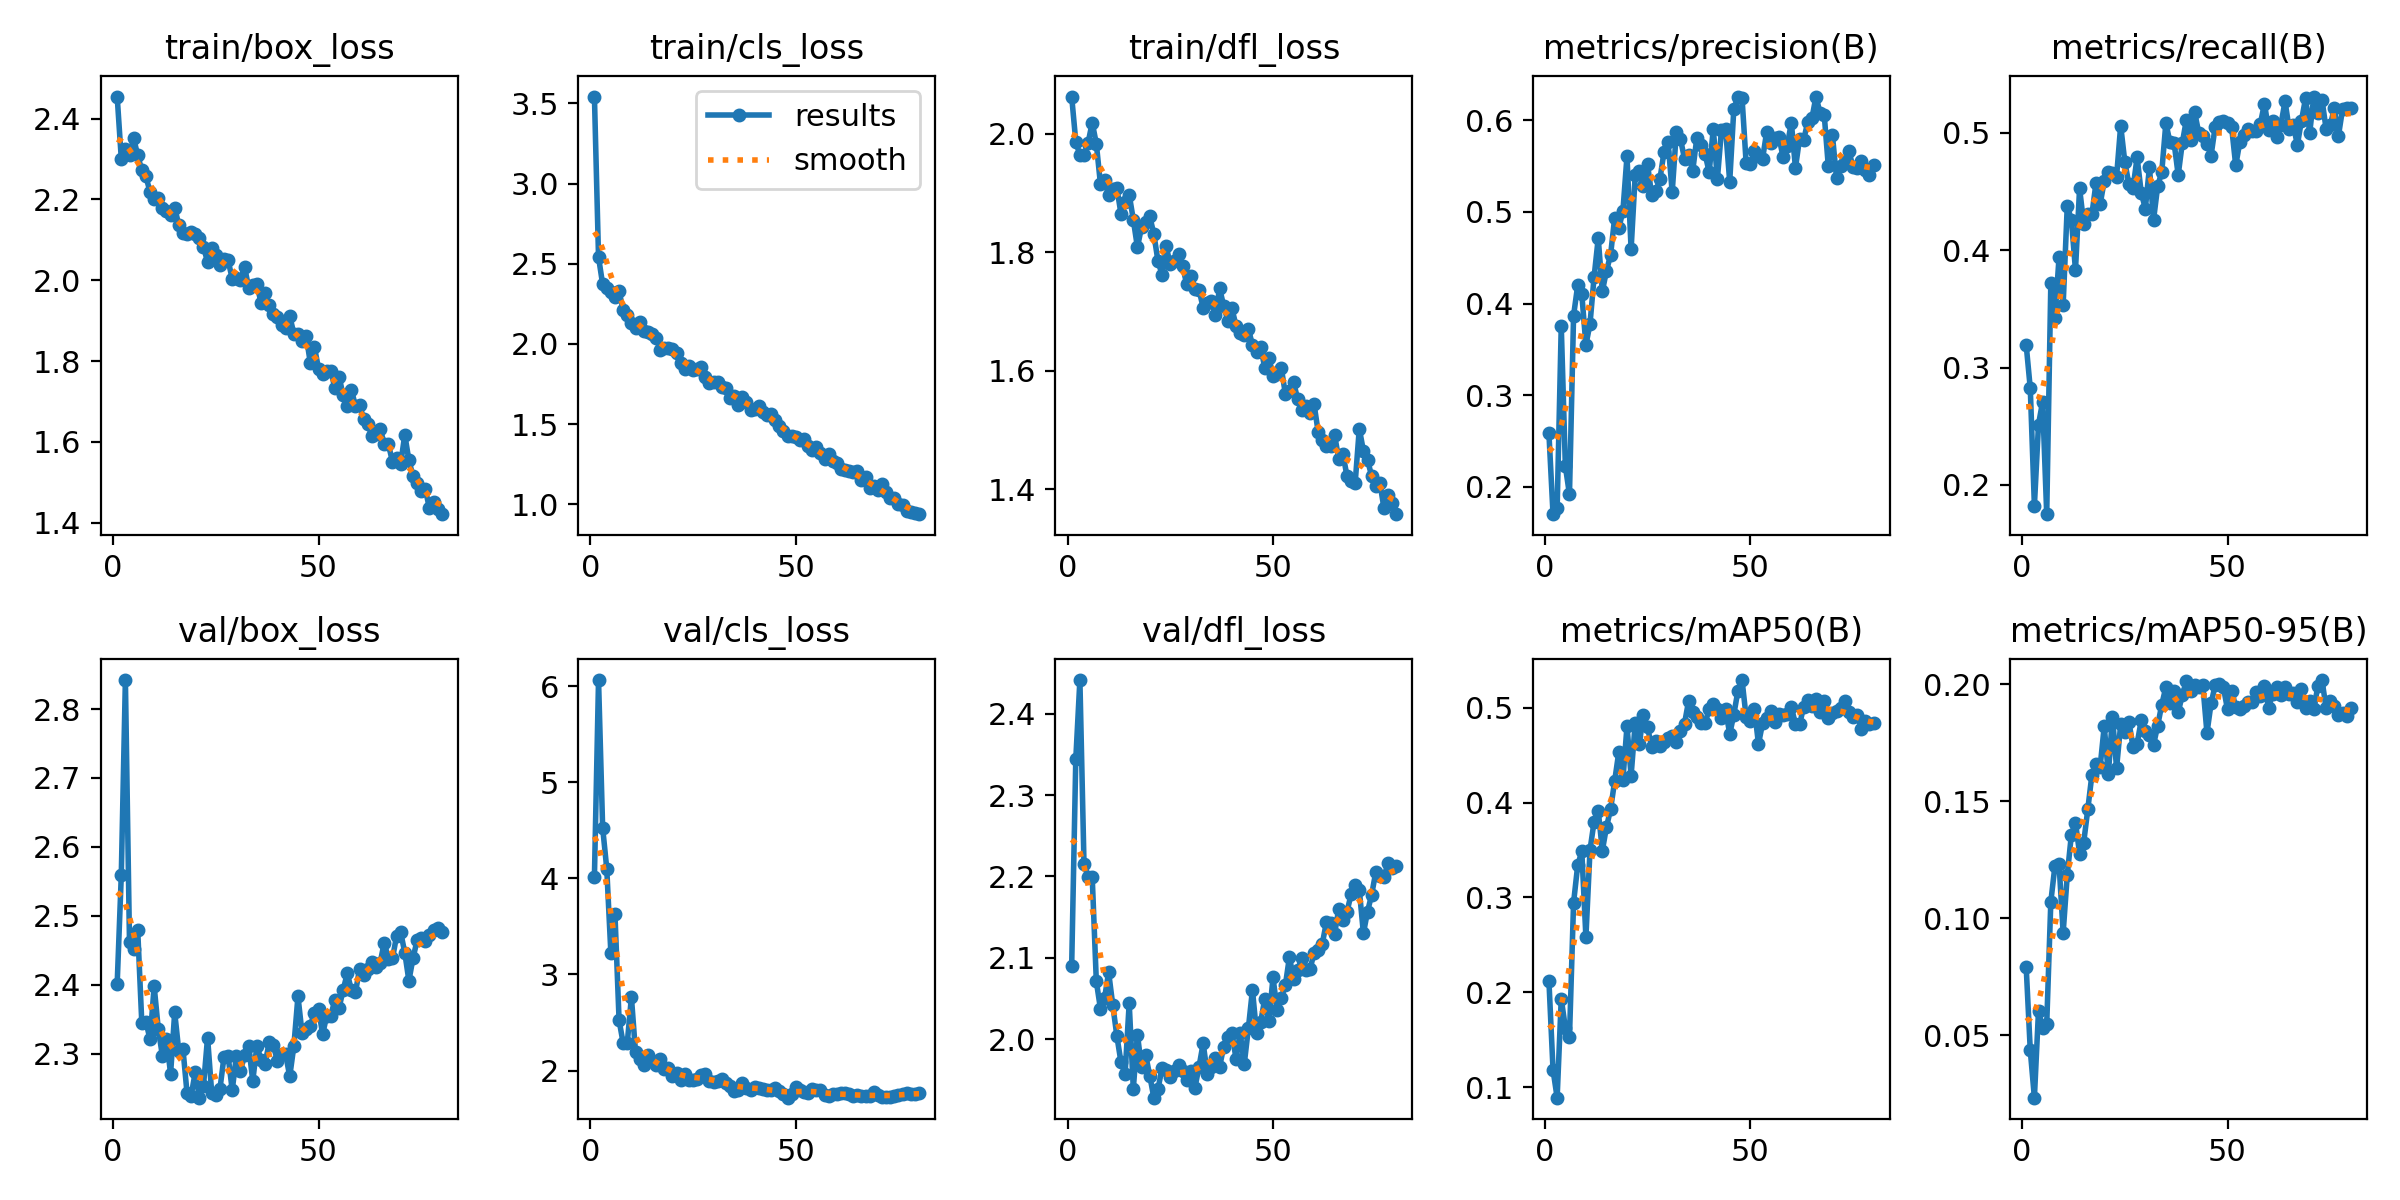

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


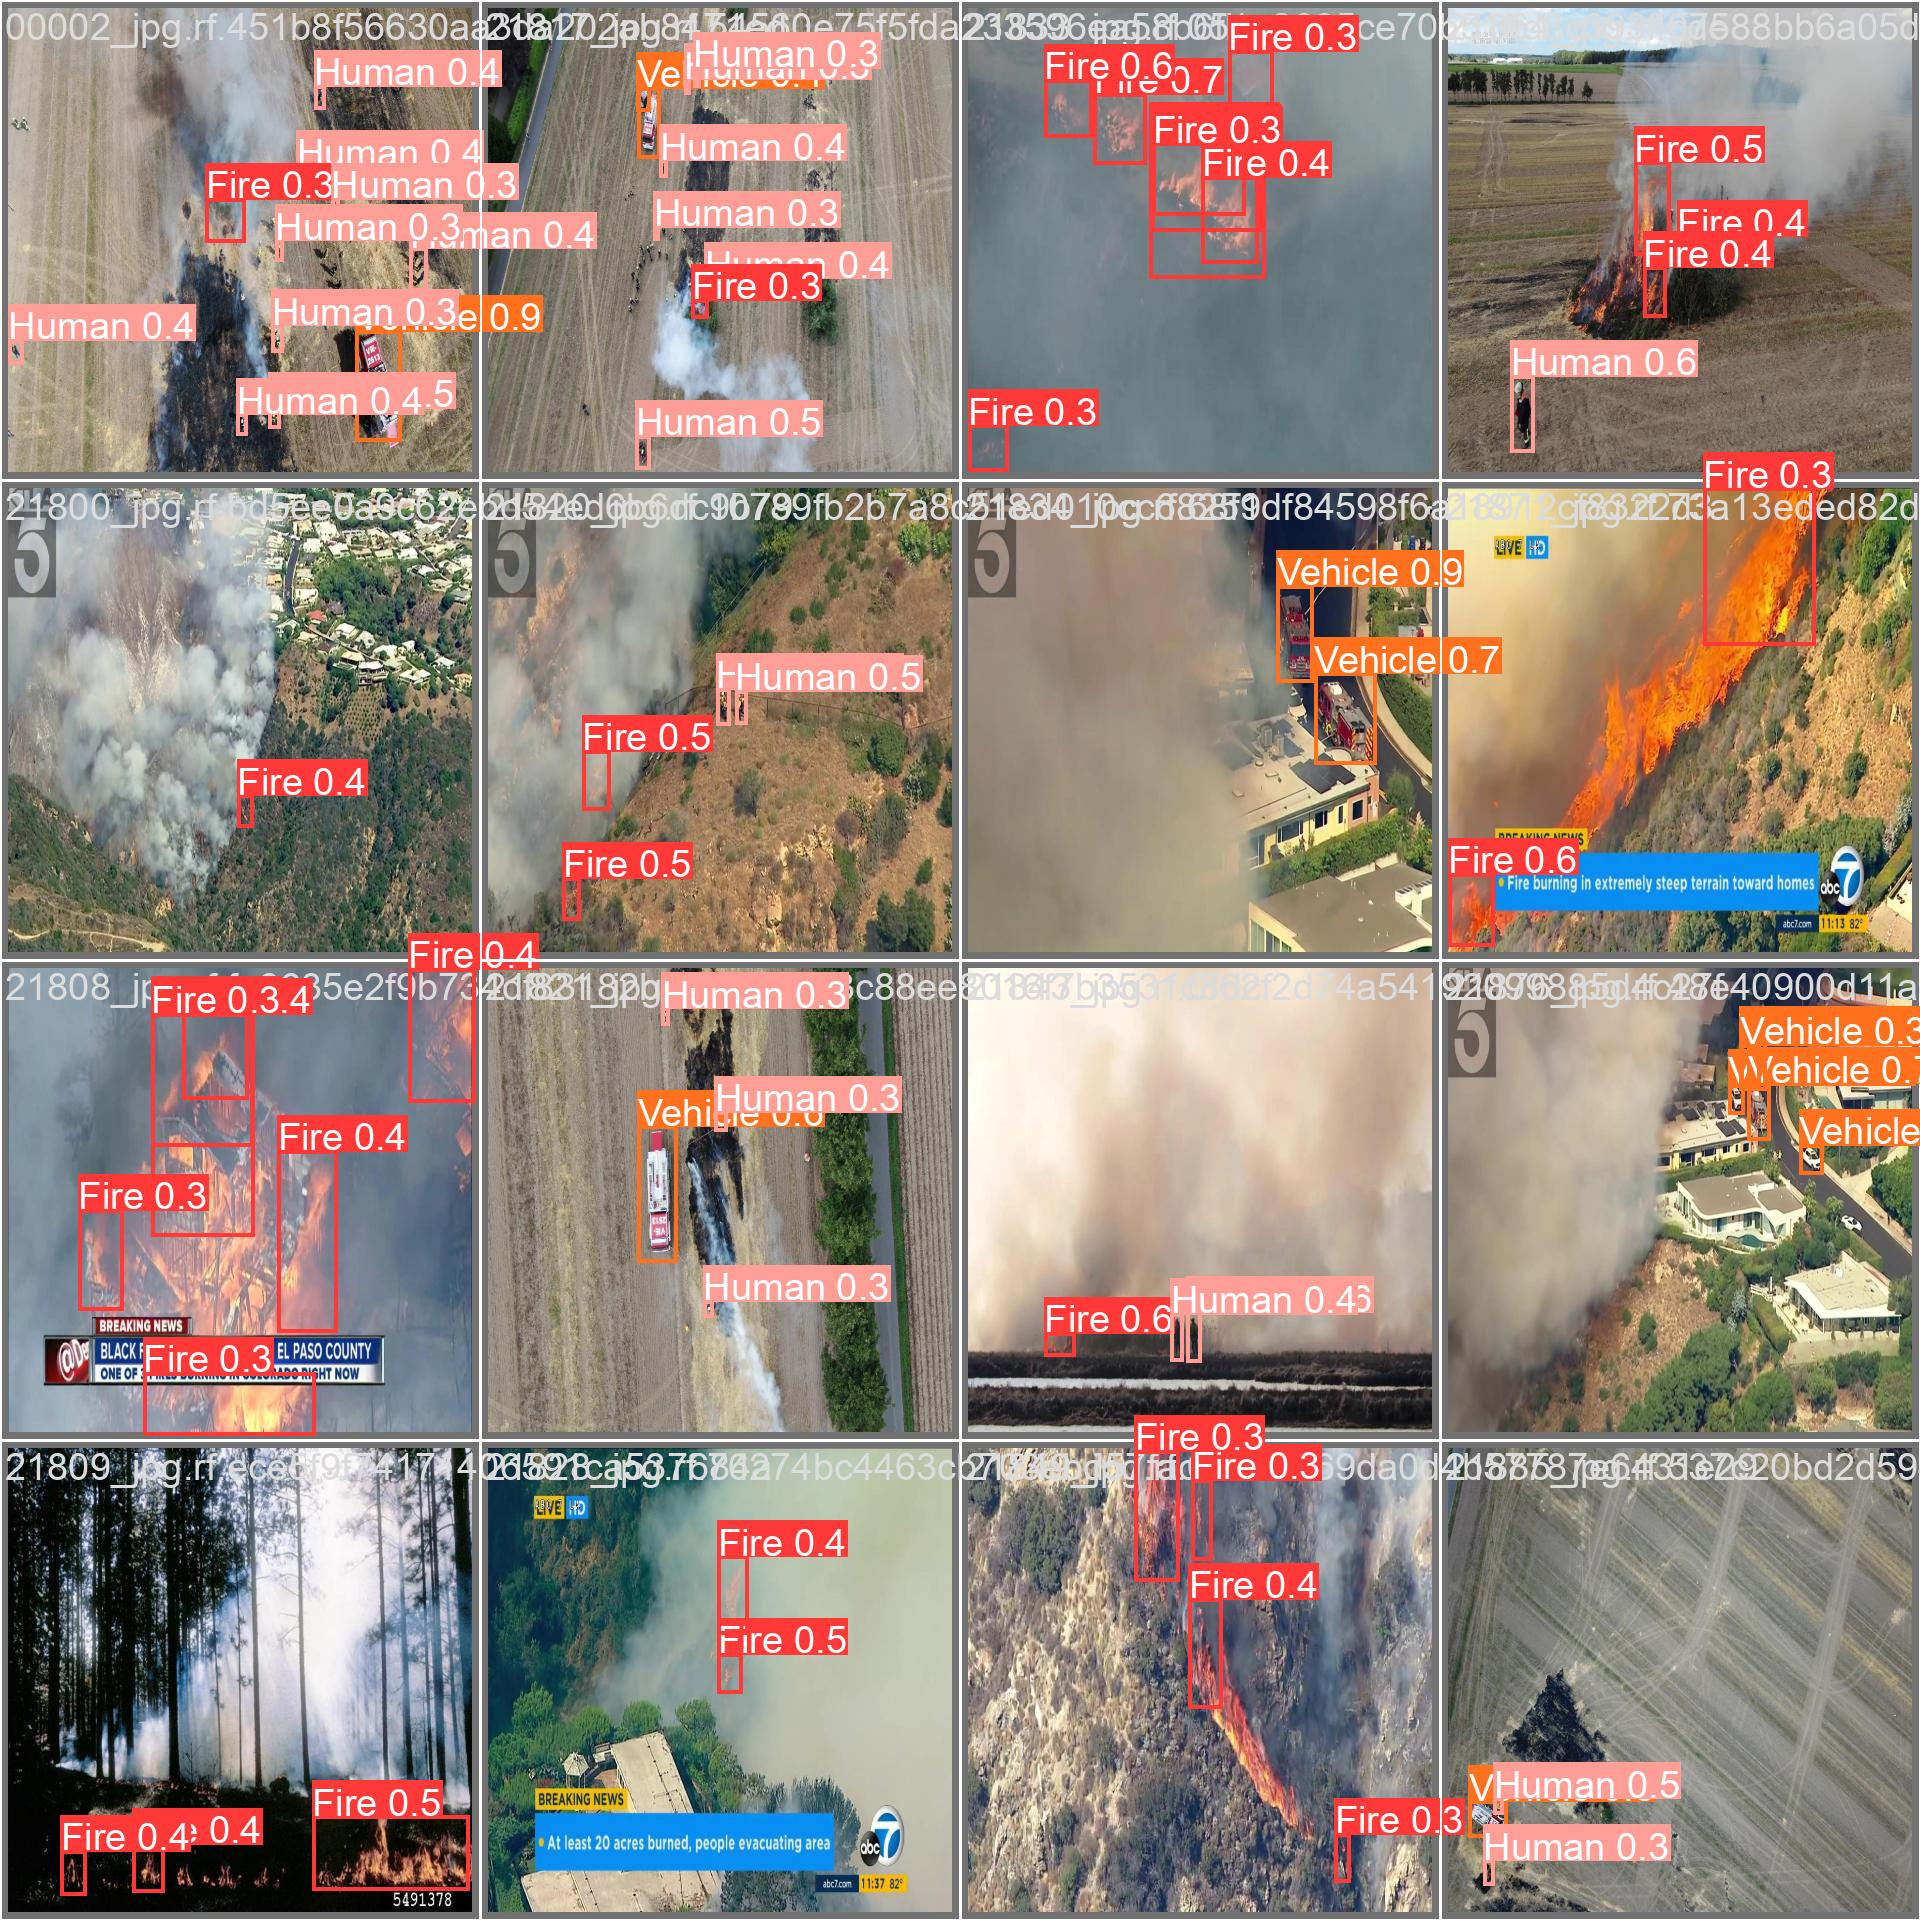

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Aerial_Object_Detection-7/valid/labels.cache... 186 images, 6 backgrounds, 0 corrupt: 100% 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:13<00:00,  1.11s/it]
                   all        186       1053      0.628      0.508       0.53      0.202
                  Fire        186        506      0.523      0.387      0.398      0.143
                 Human        186        412      0.574      0.432      0.472      0.156
               Vehicle        186        135      0.786      0.704      0.721      0.307
Speed: 13.5ms preprocess, 20.1ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/93 /content/datasets/Aerial_Object_Detection-7/test/images/00003_jpg.rf.6e3c85daf5805222adf194544ed10821.jpg: 960x960 1 Fire, 12 Humans, 1 Vehicle, 30.2ms
image 2/93 /content/datasets/Aerial_Object_Detection-7/test/images/00020_jpg.rf.f12a9cd07d5ad7cb9b09a4ba3f87e5a2.jpg: 960x960 (no detections), 30.2ms
image 3/93 /content/datasets/Aerial_Object_Detection-7/test/images/00026_jpg.rf.c1d2990ca29f4491c25994ba298a91e4.jpg: 960x960 6 Fires, 30.3ms
image 4/93 /content/datasets/Aerial_Object_Detection-7/test/images/00028_jpg.rf.362dccbf3c1179ab1012179d194e8881.jpg: 960x960 1 Fire, 3 Humans, 30.2ms
image 5/93 /content/datasets/Aerial_Object_Detection-7/test/images/00029_jpg.rf.245884f272bc7b00783543a4598ce220.jpg: 960x960 1 Fire, 10 Humans, 2 Vehicles, 30.1ms
image 6/9

**NOTE:** Let's take a look at few results.

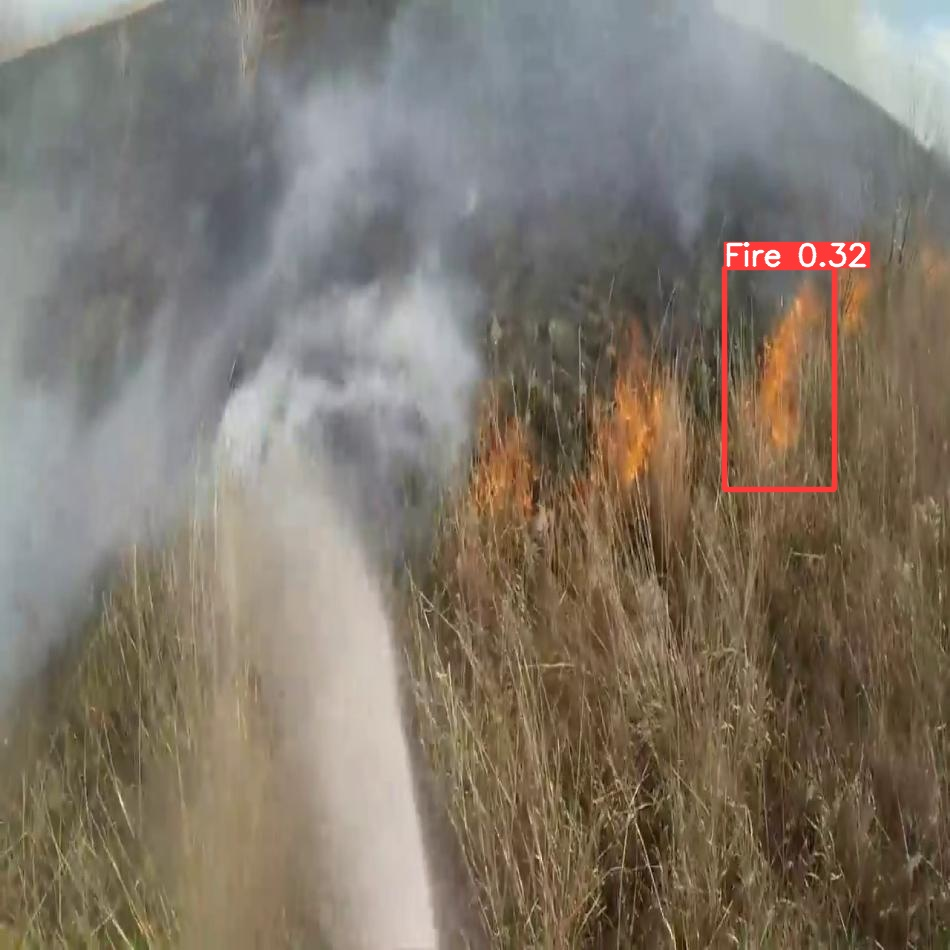

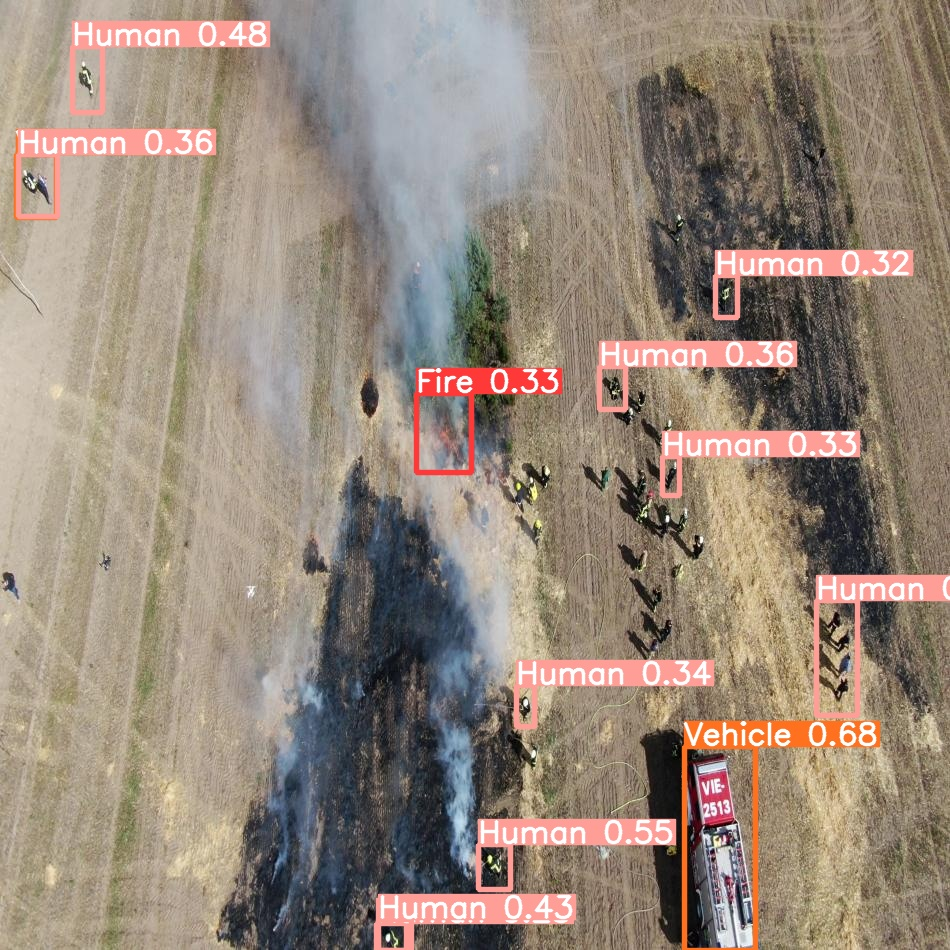

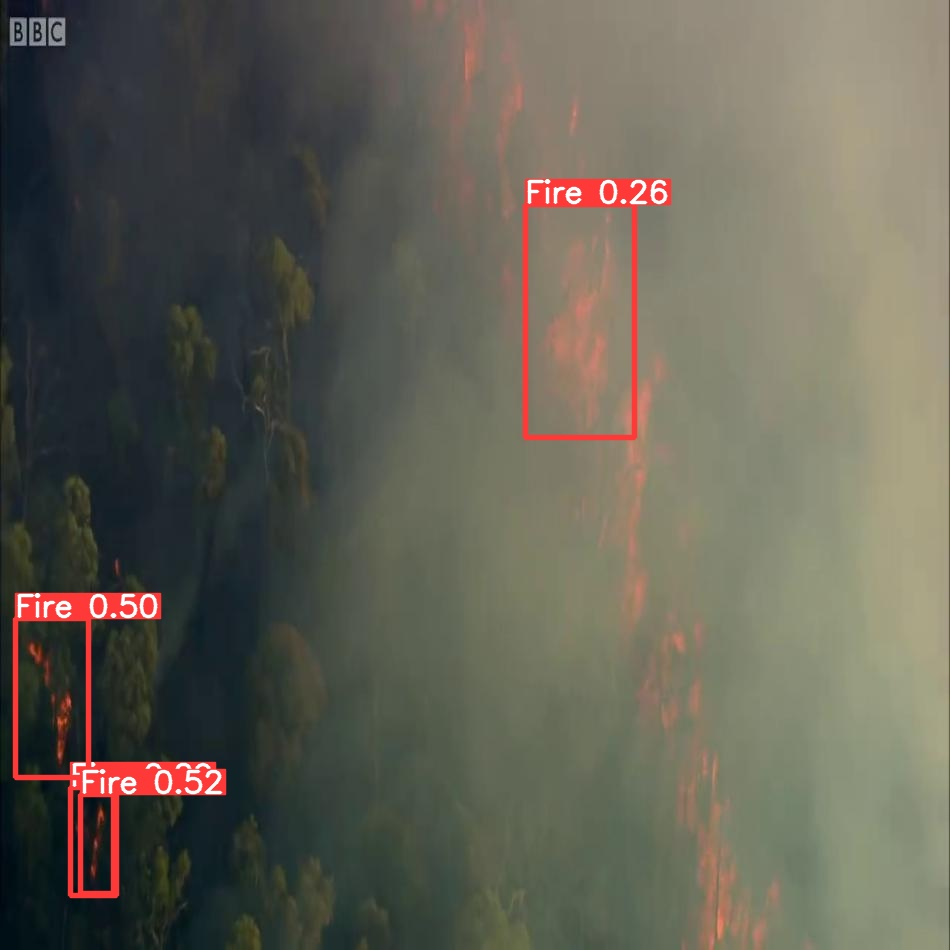

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

# Video

In [26]:
import cv2
from google.colab.patches import cv2_imshow


video_path='/content/video.mp4'

cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc= cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4',fourcc,30.0,(frame_width,frame_height))

while cap.isOpened():
  ret,frame = cap.read()
  if not ret:
    break;

  result=model(frame,save=True)
  cv2.waitKey(1)

  res_plotted=result[0].plot()
  cv2_imshow(res_plotted)
  out.write(res_plotted)
  if cv2.waitKey(1) == ord('q'):
    break



Output hidden; open in https://colab.research.google.com to view.